In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

C:\Users\234ja\New folder\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
start ='2012-01-01'
end ='2022-12-21'
stock = 'GOOG'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [6]:
ma_100_days = data.Close.rolling(100).mean()

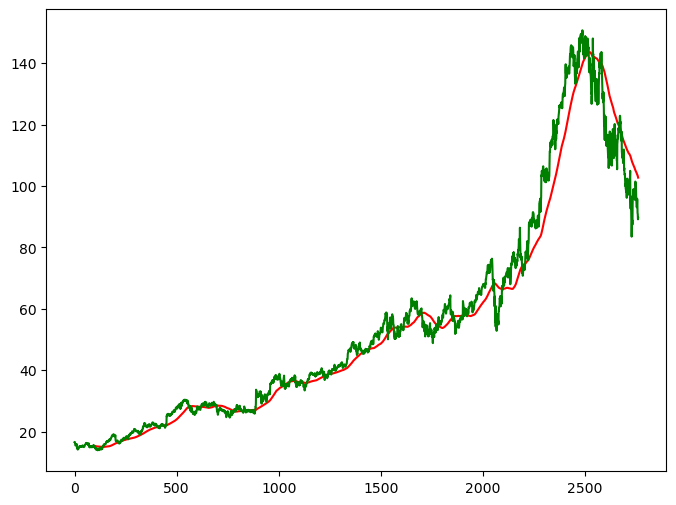

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [9]:
ma_200_days=data.Close.rolling(200).mean()

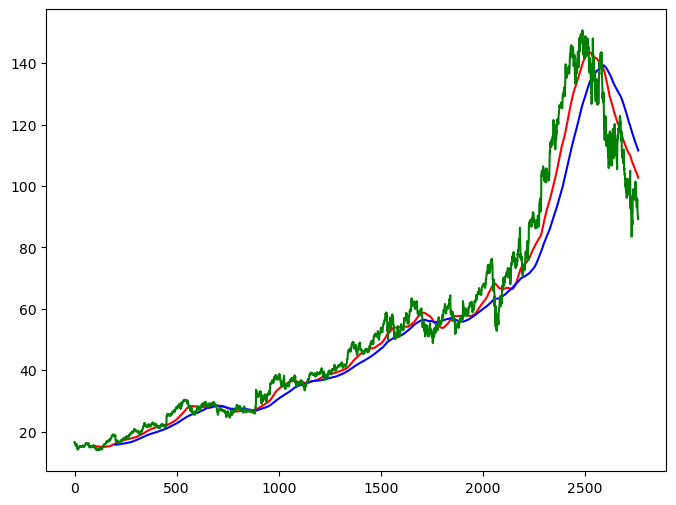

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [15]:
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [16]:
data_train.shape[0]

2208

In [17]:
data_test.shape[0]

553

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_scale=scaler.fit_transform(data_train)

In [20]:
x=[]
y=[]


for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [22]:
x,y=np.array(x),np.array(y)

In [21]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
              input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))


model.add(LSTM(units=60 , activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80 , activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120 , activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [28]:
model.fit(x,y,epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 [==============================] - 36s 443ms/step - loss: 0.0256
Epoch 2/50
66/66 [==============================] - 31s 473ms/step - loss: 0.0065
Epoch 3/50
66/66 [==============================] - 31s 477ms/step - loss: 0.0060
Epoch 4/50
66/66 [==============================] - 32s 485ms/step - loss: 0.0046
Epoch 5/50
66/66 [==============================] - 32s 483ms/step - loss: 0.0053
Epoch 6/50
66/66 [==============================] - 31s 464ms/step - loss: 0.0046
Epoch 7/50
66/66 [==============================] - 30s 460ms/step - loss: 0.0036
Epoch 8/50
66/66 [==============================] - 30s 461ms/step - loss: 0.0039
Epoch 9/50
66/66 [==============================] - 31s 464ms/step - loss: 0.0037
Epoch 10/50
66/66 [==============================] - 30s 452ms/step - loss: 0.0035
Epoch 11/50
66/66 [==============================] - 28s 423ms/step - loss: 0.0034
Epoch 12/50
66/66 [==============================] - 28s 418ms/step - loss: 0.0033
Epoch 13/50
6

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [30]:
pas_100_days=data_train.tail(100)

In [31]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [32]:
data_test

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [36]:
data_test_scale=scaler.fit_transform(data_test)

In [37]:
x=[]
y=[]


for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [38]:
y_predict=model.predict(x)

18/18 [==============================] - 3s 99ms/step


In [39]:
y_predict

array([[0.10636206],
       [0.10466322],
       [0.10374907],
       [0.10368568],
       [0.10440098],
       [0.10580803],
       [0.10772195],
       [0.10995764],
       [0.11242077],
       [0.11510578],
       [0.11808988],
       [0.12132356],
       [0.12471822],
       [0.12806766],
       [0.1311905 ],
       [0.1340512 ],
       [0.13669932],
       [0.13928017],
       [0.14220719],
       [0.14592089],
       [0.15065415],
       [0.15649734],
       [0.16329233],
       [0.17080764],
       [0.17872848],
       [0.18673241],
       [0.19458713],
       [0.20208605],
       [0.20900595],
       [0.2152    ],
       [0.22054318],
       [0.22494051],
       [0.2284094 ],
       [0.23107472],
       [0.23316754],
       [0.23484893],
       [0.23634362],
       [0.23792322],
       [0.23983197],
       [0.24214754],
       [0.24501304],
       [0.2484514 ],
       [0.25237447],
       [0.2566346 ],
       [0.26100197],
       [0.26502672],
       [0.26821694],
       [0.270

In [43]:
scale=1/scaler.scale_

In [44]:
y_predict=y_predict*scale

In [45]:
y=y*scale

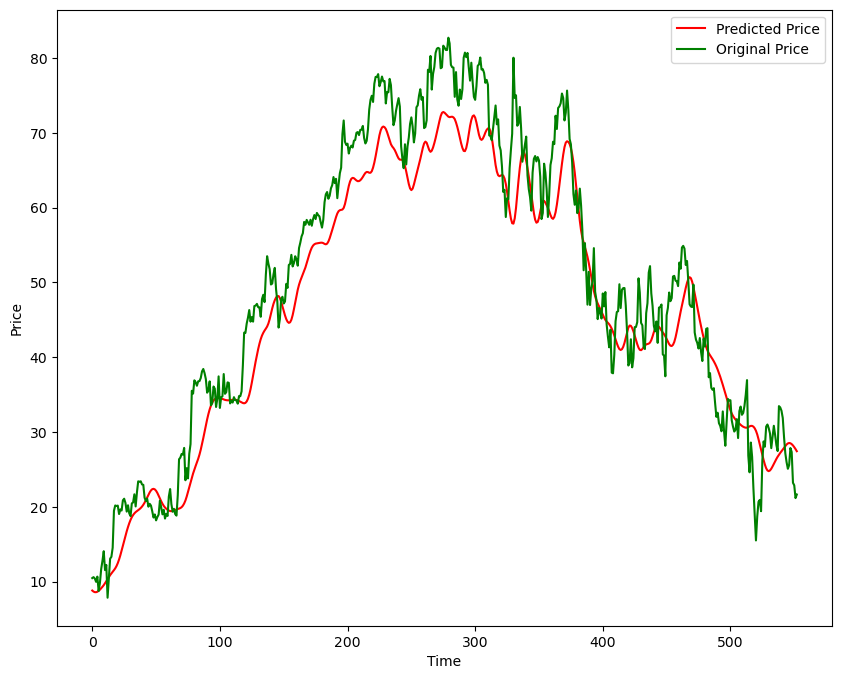

In [46]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [47]:
model.save('Stock Predictions Model.keras')